In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

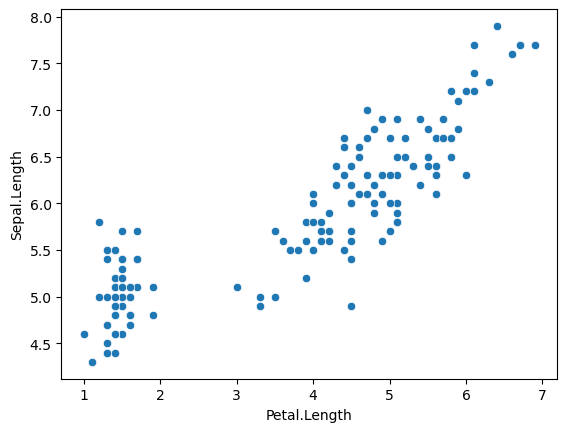

In [3]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [5]:
# Normalizando datos
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])

# Gaussian Mixture

In [6]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
labels = gm.predict(X_std)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Text(0.5, 1.0, 'Método de Gaussian mixture')

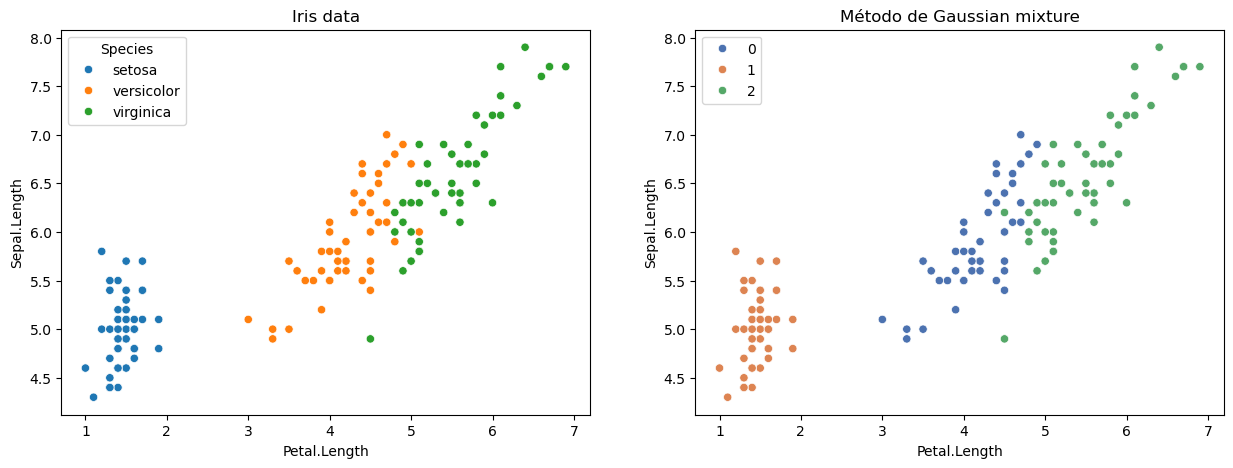

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='Species', ax=axes[0]).set_title('Iris data')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=labels, palette='deep', ax=axes[1]).set_title('Método de Gaussian mixture')

In [9]:
df['modelo Gaussiano'] = labels

mapeo = {1: 'setosa', 2: 'virginica', 0: 'versicolor'}
df['modelo Gaussiano'] = df['modelo Gaussiano'] .map(mapeo)
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   

  modelo Gaussiano  
0           setosa  
1           setosa

In [10]:
categorias = df.Species.unique()
matriz_conf = {}

for cateogiras_real in categorias:
    real = []
    for categorias_modelo in categorias:
        total = len(df[(df.Species == cateogiras_real) & (df['modelo Gaussiano'] == categorias_modelo)])
        real.append(total)
    matriz_conf[cateogiras_real] = real
matriz_conf

{'setosa': [50, 0, 0], 'versicolor': [0, 45, 5], 'virginica': [0, 0, 50]}

In [11]:
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'Real')

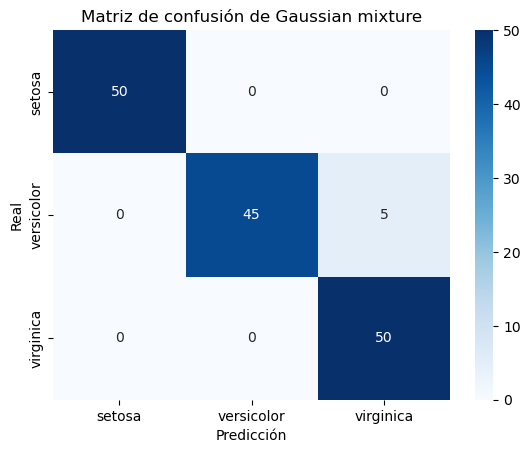

In [12]:
cm_gauss = confusion_matrix(df.Species, df['modelo Gaussiano'], labels=df.Species.unique())

sns.heatmap(cm_gauss, annot=True, 
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues").set_title("Matriz de confusión de Gaussian mixture")

plt.xlabel('Predicción')
plt.ylabel("Real")

# kmeans

In [13]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
df['kmeans'] = kmeans.labels_
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   

  modelo Gaussiano  kmeans  
0           setosa       1  
1           setosa       1

In [23]:
mapeo = {1: 'setosa', 2: 'versicolor', 0: 'virginica'}
df['kmeans'] = df['kmeans'].map(mapeo)
df

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

    modelo Gaussiano      kmeans  
0             setosa      setosa  
1             setosa      setosa  
2             setosa      setosa  
3             setosa      setosa  
4             setosa      setosa  
..               ...         ...  
145        virginica   virginica  
146        virginica  versicolor  
147        virginica   virginica  
148        virginica   virginica  
149        virginica  versicolor  

[150 rows x 7 columns]

Text(792.3131313131312, 0.5, 'Real')

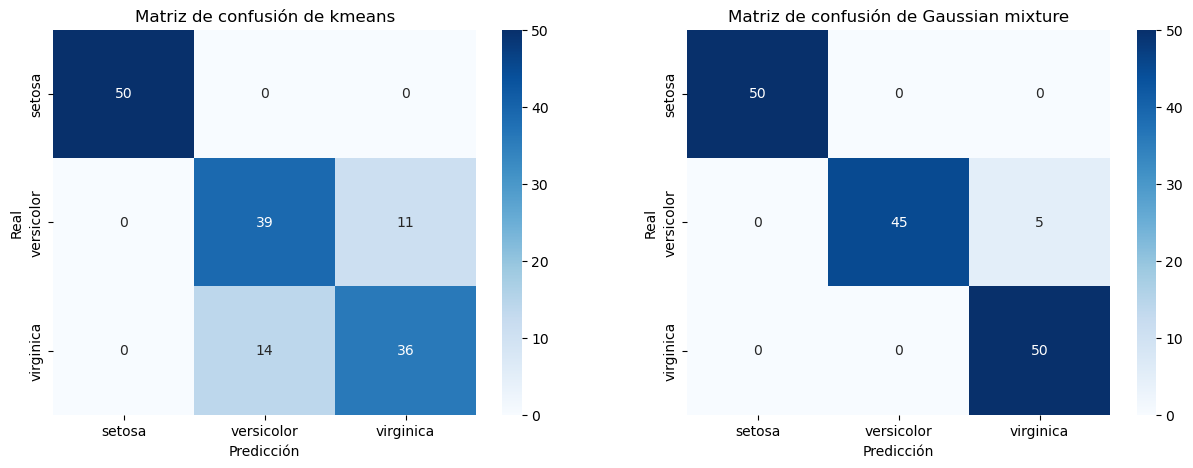

In [27]:
cm_kmeans = confusion_matrix(df.Species, df.kmeans, labels=df.Species.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm_kmeans, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[0]).set_title("Matriz de confusión de kmeans")

axes[0].set_xlabel('Predicción')
axes[0].set_ylabel("Real")

sns.heatmap(cm_gauss, annot=True,
            xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
           cmap="Blues", ax = axes[1]).set_title("Matriz de confusión de Gaussian mixture")

axes[1].set_xlabel('Predicción')
axes[1].set_ylabel("Real")

# Clustering jerárquico

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

[]

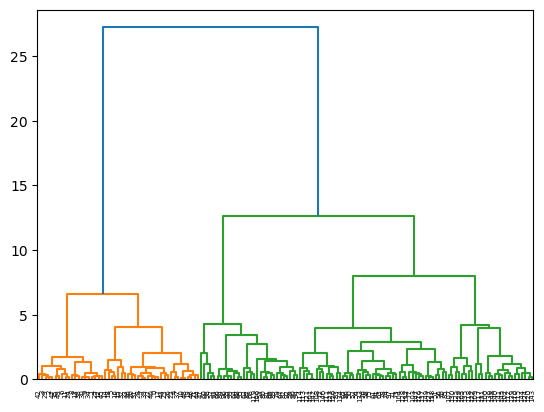

In [32]:
Z = linkage(X_std, 'ward')

dendrogram(Z)
plt.plot()

In [37]:
clusters = fcluster(Z, t=10, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Text(0.5, 1.0, 'Cluster jerárquico')

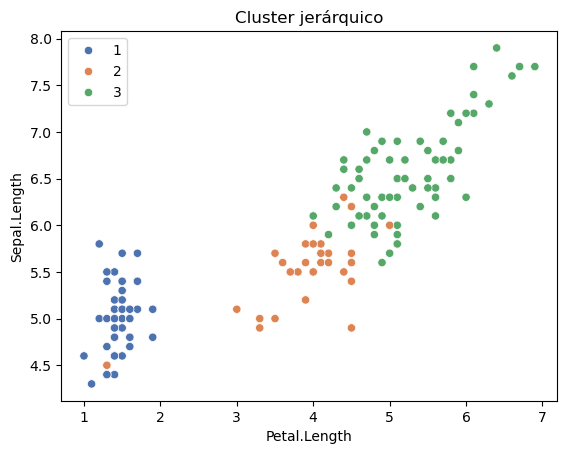

In [38]:
sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=clusters, palette='deep').set_title('Cluster jerárquico')